<a href="https://colab.research.google.com/github/SergeyS1954/CLT/blob/main/LW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 2
## Основные характеристики невосстанавливаемых элементов

## Вероятность безотказной работы для невосстанавливаемых элементов

Вероятность безотказной работы для невосстанавливаемых элементов $\mathbb{P}(t)$ --- это вероятность того, что на полуинтервале $(0,t]$ отказ системы не возникает, то есть случайная величина $\xi$, равная значению времени до отказа системы, имеет значение большее $t$.

Обозначим функцию распределения вероятностей случайной величины $\xi$ через $F_{fail}(t)$, а соответствующую плотность вероятности через $f_{fail}(t)$. Тогда    
	\begin{equation*}
		\mathbb{P}_{nofail}(t) = \mathbb{P}(\xi > t) = 1 - F_{fail}(t) = 1 - \int_{0}^{t}f_{fail}(u)du.
	\end{equation*}

Непосредственно из определения следует интуитивно очевидное свойство вероятностей указанных случайных величин: с ростом времени $t$ вероятность безотказной работы системы на полуинтервале $(0,t]$ убывает до $0$, а вероятность отказа системы на полуинтервале  возрастает до $1$.  


Математическое ожидание времени безотказной работы системы
	$$
	\mathbb{M}_{nofail} = \bar{t}_{nofail} = \int_{0}^{\infty}t f(t)dt = \int_{0}^{\infty}tdF(t) = \int_{0}^{\infty}d\mathbb{P}_{nofail}.
	$$

Из последнего соотношения следует, что математическое ожидание времени безотказной работы есть интеграл (то есть площадь под кривой) от вероятности безотказной работы при бесконечном увеличении времени.



Интенсивность отказов $\lambda(t)$ ГОСТ 27.002 определяет
как условную плотность вероятности возникновения отказа невосстанавливаемого элемента, при условии, что до момента времени $t$ отказа не произошло.

Вероятность безотказной работы системы на полуинтервале $(t,t + \Delta t]$ при условии. что до момента $t$ система работала безотказно есть:

$$
	\mathbb{P}_{nofail}(\xi > t + \Delta t | \xi > t) =\mathbb{P}_{nofail}(A | B) = \frac{\mathbb{P}_{nofail}(A  B)}{\mathbb{P}_{nofai}(B)}  
	= \frac{\int_{t + \Delta t}^{\infty}f(t)dt}{\int_{t}^{\infty}f(t)dt}.
$$
Вычисляем:
$$		\lambda(t) = \underset{\Delta t \rightarrow 0} \lim \frac{\mathbb{P}(t) - \mathbb{P}(t + \Delta t)}{\mathbb{P}(t) \Delta t} = \\
		= - \frac{1}{\mathbb{P}(t)}  \underset{\Delta t \rightarrow 0} \lim \frac{\mathbb{P}(t + \Delta t) - \mathbb{P}(t)} {\Delta t} =  
		\\
		= - \frac{1}{\mathbb{P}(t)} \frac{d}{d t}\mathbb{P}(t)  = - \frac{d}{d t}\left[\ln \mathbb{P}(t)]\right.
$$
Потенциируя, получаем:
$$
	\mathbb{P}_{nofail}(t) = \exp \left(- \int_{0}^{t}\lambda(u)du\right).
$$


Представленное уравнение для $\mathbb{P}_{nofail}(t)$ связывает вероятность безотказной работы невосстанавливаемого элемента с интенсивностью отказов.

Рассмотрим пример для  случая постоянной интенсивности отказов $\lambda = const$.

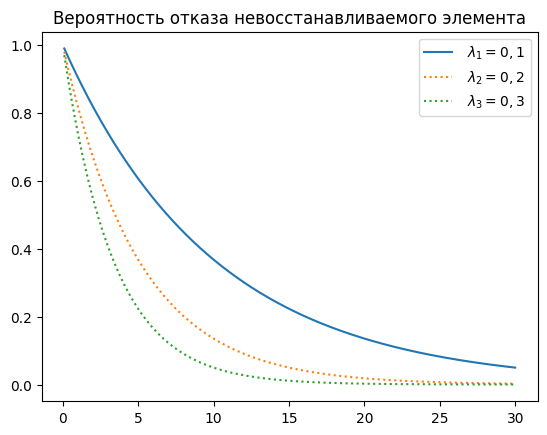

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
lam = 0.1
x = np.arange (0.1, 30.0, 0.01)
y1 = np.exp(-lam*x)
y2 = np.exp(-2*lam*x)
y3 = np.exp(-3*lam*x)
plt.plot(x,y1, label = r" $\lambda_1 = 0,1$")
plt.plot(x,y2, linestyle = ':', label = r" $\lambda_2 = 0,2$")
plt.plot(x,y3, linestyle = ':', label = r" $\lambda_3 = 0,3$")
plt.legend()
plt.title('Вероятность отказа невосстанавливаемого элемента')
plt.show()

# Гамма-распределение
Распределение Эрланга может быть обобщено на случай, когда параметр $k$ принимает не целые, а действительные значения. В этом случае говорят о гамма-распределении, причем традиционно второй параметр принято обозначать $\alpha$.

Плотность гамма-распределения с параметрами $\lambda$ и $\alpha$ задается как:
$$
f(t) =
	\frac{\lambda (\lambda t)^{\alpha-1}}{\Gamma(\alpha)} e^{-\lambda t}.
$$

Напомним, что гамма-функция задается формулой
$$
\Gamma(\alpha) = \int_{0}^{\infty}e^{-y}y^{\alpha - 1} dy.
$$
Математическое ожидание и дисперсия случайной величины, имеющей гамма-распределение с параметрами $\lambda$ и $\alpha$ определяются формулами:
$$
\mathbb{M}(\xi) = \frac{\alpha}{\lambda} , \ \ \mathbb{D}(\xi) = \frac{\alpha}{\lambda^2}.$$

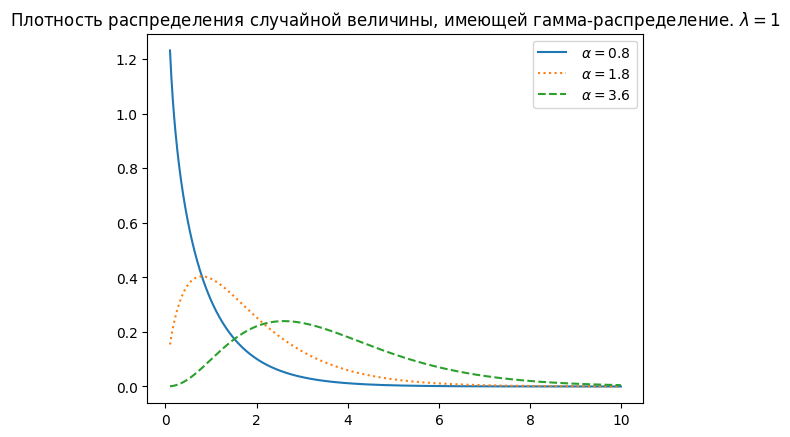

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
lam = 1.0
x = np.arange (0.1, 10.0, 0.01)
y2 = stats.gamma.pdf(x, 0.8)
y3 = stats.gamma.pdf(x, 1.8)
y4 = stats.gamma.pdf(x, 3.6)
plt.plot(x,y2, label = r" $\alpha = 0.8$")
plt.plot(x,y3, linestyle = ':', label = r" $\alpha = 1.8$")
plt.plot(x,y4, linestyle = '--', label = r" $\alpha = 3.6$")
plt.legend()
plt.title('Плотность распределения случайной величины, имеющей гамма-распределение. $\lambda = 1$')
plt.show()

# Распределение Вейбулла

В приложениях теории надежности еще одним распространенным  распределением является распределение Вейбулла, которое иногда называют *распределением экстремального значения*.

Распределение Вейбулла так же, как гамма-распределение можно рассматривать как обобщенное экспоненциальное распределение.

Распределение Вейбулла является параметрическим и зависит от трех параметров: $a > 0$ --- параметр масштаба,    $b > 0$ --- параметр формы, и $c > 0$.


Плотность распределения Вейбулла задается формулой:

$$
f(t) =  
	\frac{c}{b} \left(\frac{t - a}{b}\right)^{c-1} \exp\left[-(\frac{t - a}{b})^c\right].
$$

Из вида функции плотности распределения можно сделать вывод, что величина $x = {t - a}^c $ распределена по экспоненциальному закону с параметром $b^c$.

В частности, при $a = 0$ и $c = 1$  распределение Вейбулла вырождается в экспоненциальное (показательное) распределение с параметром $\lambda = 1/b$.


Математическое ожидание случайной величины, имеющей распределение Вейбулла с параметрами $a, b$ и $c$ определяются формулой:
$$
\mathbb{M}(\xi) = a + b\Gamma\left( 1+ \frac{1}{c}\right),
$$
где $\Gamma\left( 1+ \frac{1}{c}\right)$ --- значение гамма-функции в соответствующей точке.

График плотности распределения Вейбулла представляет собой $L$-образную кривую для $0 < c \leq 1$ и колоколообразную кривую для $c > 1$.

Иногда распределение Вейбулла рассматривают в форме, когда анализируется величина $x = \frac{t - a}{b}$. В этом случае плотность распределения случайной величины $\xi_1 = \frac{t - a}{b}$ приобретает более простую  форму:  

$$
f(x) =
\begin{cases}  
	{c} x^{c-1} \exp\left(-x^c\right), & x \geq 0, \ c > 0,\\
	0, & x < 0.
\end{cases}
$$

Математическое ожидание и дисперсия случайной величины $\xi_1$, имеющей распределение Вейбулла с параметром $c$, определяются формулами:

$$
\mathbb{M}\xi_1 = \Gamma\left( 1+ \frac{1}{c}\right) , \  \ \mathbb{D}\xi = \Gamma\left(1 + \frac{2}{c}\right) - \Gamma\left(1 + \frac{1}{c}\right)^2.
$$

Интенсивность отказов для элемента, время жизни которого имеет распределение Вейбулла,  задается соотношением:

$$
\lambda(x) = \frac{f(x)}{1 - F(x)} = c x^{c-1}.
$$

На интервале  $ 0 < c < 1$ распределение Вейбулла моделирует "отрицательное" старение, т.е. модель "новое хуже старого", а при $ c > 1$  распределение Вейбулла  моделирует "положительное" старение элемента, т.е. модель "новое лучше старого".


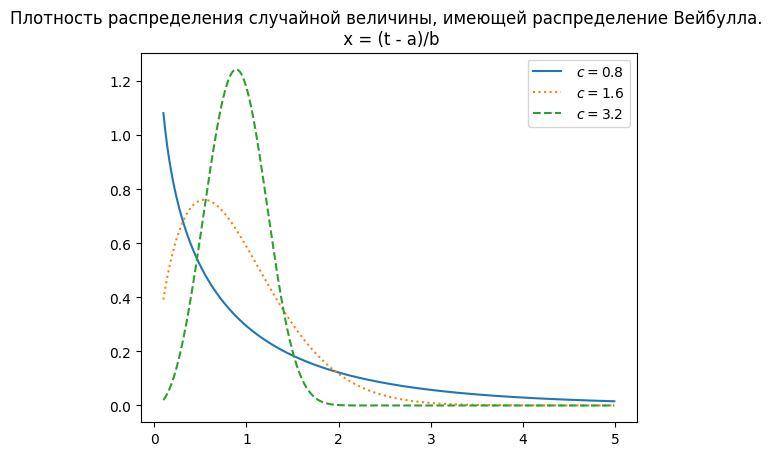

In [ ]:
# x = (t - a)/ b
x = np.arange (0.1, 5.0, 0.01)
y2 = stats.weibull_min.pdf(x, 0.8)
y3 = stats.weibull_min.pdf(x, 1.6)
y4 = stats.weibull_min.pdf(x, 3.2)
plt.plot(x,y2, label = r" $с = 0.8$")
plt.plot(x,y3, linestyle = ':', label = r" $с = 1.6$")
plt.plot(x,y4, linestyle = '--', label = r" $с = 3.2$")
plt.legend()
plt.title('Плотность распределения случайной величины, имеющей распределение Вейбулла. \n x = (t - a)/b')
plt.show()

# Бета-распределение


Бета-распределение играет ключевую роль в байесовских процедурах оценивания параметров. Если случайные величины $\xi_1, \xi_2,\dots,\xi_n$ независимы и равномерно распределены на отрезке $[0,1]$, то плотность распределения $k$-й порядковой статистики задается бета-распределением с параметрами: $\alpha = k$ и $\beta = n - k + 1.$

Моменты бета-распределения задаются формулой:
$$
\mathbb{M}(\xi^n) = \frac{\Gamma(\alpha + k)\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\alpha + \beta)}.
$$

Дисперсия бета-распределения задается формулой:

$$
\mathbb{D}(\xi) = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}.
$$


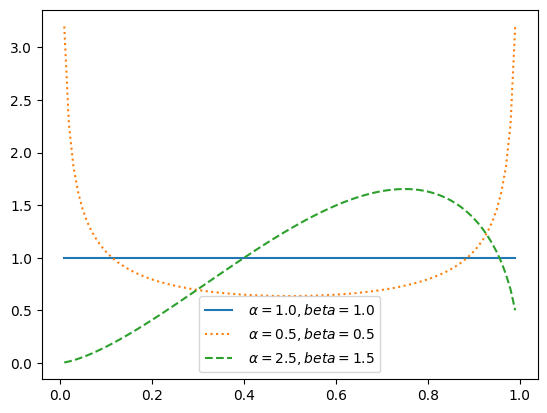

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
alpha = 1.0
beta = 1.0
x = np.arange (0.01, 1.0, 0.01)
y2 = stats.beta.pdf(x, alpha, beta)
y3 = stats.beta.pdf(x, 0.5*alpha, 0.5*beta)
y4 = stats.beta.pdf(x, 2.5*alpha, 1.5*beta)
plt.plot(x,y2, label = r" $\alpha = 1.0, beta = 1.0$")
plt.plot(x,y3, linestyle = ':', label = r" $\alpha = 0.5, beta = 0.5$")
plt.plot(x,y4, linestyle = '--', label = r" $\alpha = 2.5, beta = 1.5$")
plt.legend()
#plt.show()


При $\alpha > 1 $ и $\beta > 1 $ бета-распределение унимодально с модой в точке $x = \frac{\alpha - 1}{\alpha + \beta - 2}.$

В случае   $\alpha = 1, \beta = 1$ бета-распределение вырождается в равномерное распределение, заданное на отрезке $[0,1].$

В случае   $\alpha = 1/2, \beta = 1/2$ бета-распределение задает распределение арксинуса.


# Распределение Пуассона

Дискретное распределение Пуассона широко используется в теории надежности для моделирования числа событий, которые происходят (произойдут) на некотором временном отрезке.

распределение Пуассона --- однопараметрическое, параметр обычно называют $\lambda$.

Вероятность события, состоящего в том, что случайная величина $\xi$ примет значение $k$ есть:
$$
P(\xi = k) = \frac{\lambda^k}{k!} e^{-\lambda}.
$$

Математическое ожидание и дисперсия случайной величины, имеющей распределение Пуасона с параметром $\lambda$ определяются формулами:
$$
\mathbb{M}(\xi) = \lambda, \ \ \mathbb{D}(\xi) = {\lambda}.
$$

Ниже представлены кумулятивные вероятности (дискретный аналог функции распределения) для случайных величин, имеющих распределение Пуассона с параметрами $\lambda_1 = 1$ и  $\lambda_2 = 2$.

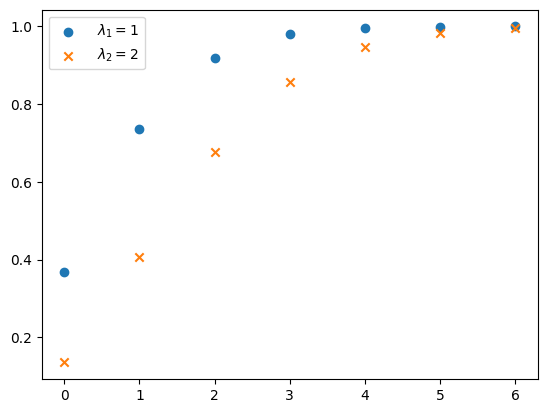

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
lam = 1.0
x = np.arange (0, 7, 1)
y1 = stats.poisson.cdf(x, lam)
y2 = stats.poisson.cdf(x, 2.0*lam)
plt.scatter(x,y1, label = r" $\lambda_1 = 1$")
plt.scatter(x,y2, marker='x', label = r" $\lambda_2 = 2$")
plt.legend()
plt.show()
